In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from scipy import stats
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score,recall_score,classification_report


In [2]:
#Part 1 PCA, test/valid, 
# train = 80%: test = 20%
cancer = load_breast_cancer()
xtrain,xtest,ytrain,ytest = train_test_split(cancer.data,cancer.target,test_size = 0.2,random_state = 0,shuffle = True)
#standardization
std = StandardScaler()
sxtrain = std.fit_transform(xtrain)
model = SVC(kernel = 'linear',C=1)


1
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

[[42  5]
 [ 6 61]]
2
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

[[43  4]
 [ 4 63]]
3
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        47
           1       0.94      0.96      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0

C:\Users\matth\AppData\Local\Temp\ipykernel_22568\1085584213.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize =(2,3))


[[46  1]
 [ 6 61]]
27
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        47
           1       0.98      0.91      0.95        67

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

[[46  1]
 [ 6 61]]
28
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        47
           1       0.98      0.91      0.95        67

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114

[[46  1]
 [ 6 61]]
29
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        47
           1       0.98      0.91      0.95        67

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted

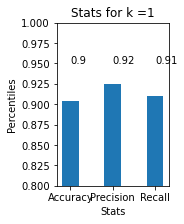

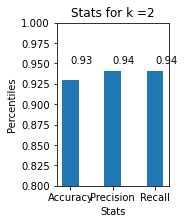

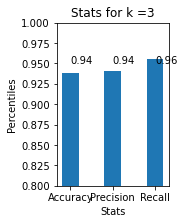

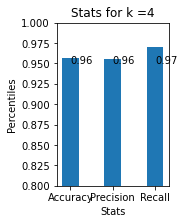

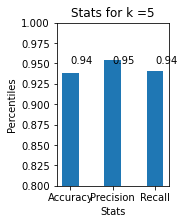

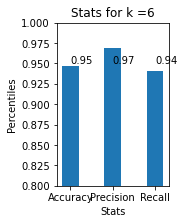

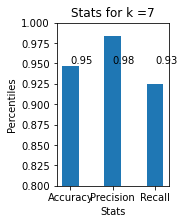

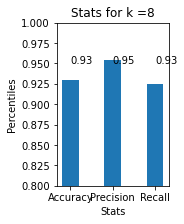

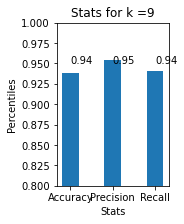

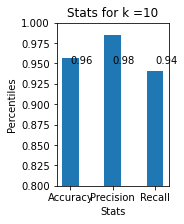

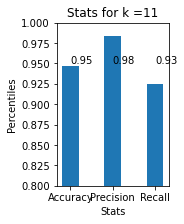

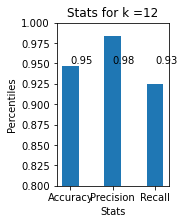

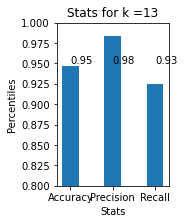

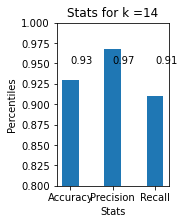

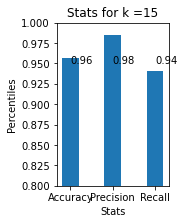

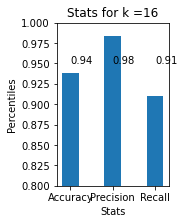

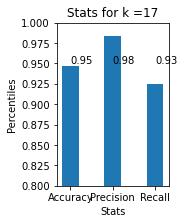

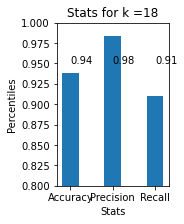

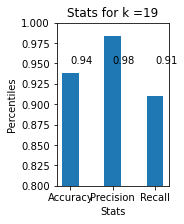

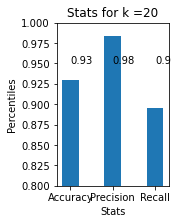

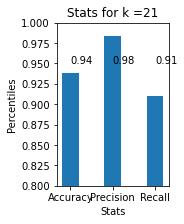

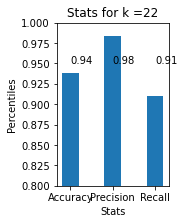

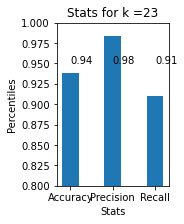

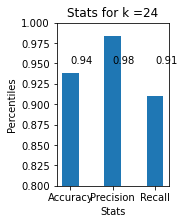

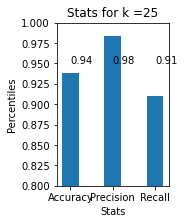

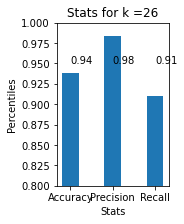

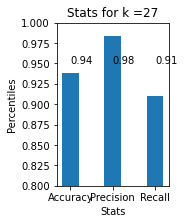

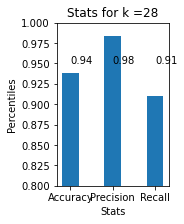

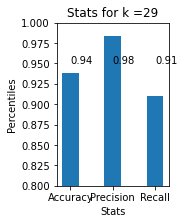

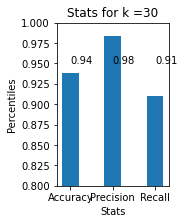

In [3]:
#Part 1 LINEAR 
for i in range(30):
    print(i+1)
    pca = PCA(n_components = (i+1))
    xtrain_pca = pca.fit_transform(sxtrain)
    xtest_pca = pca.fit_transform(std.fit_transform(xtest))
    
    model.fit(xtrain_pca,ytrain)
    
    g = model.predict(xtest_pca)
    c = ytest
    
    print(classification_report(c,g))
    print(confusion_matrix(c,g))
    
    stats = {'Accuracy':accuracy_score(c,g),'Precision':precision_score(c,g),'Recall':recall_score(c,g)}
    names = list(stats.keys())
    values = list(stats.values())
    
    fig = plt.figure(figsize =(2,3))
    plt.ylim(.8,1)
    plt.bar(names,values,width = 0.4)
    plt.xlabel("Stats")
    plt.ylabel("Percentiles")
    script = "Stats for k ="
    plt.title(script + str(i+1))
    
    for b in range(len(names)):
        plt.text(b,int(values[b])+.95,str(round(values[b],2)))
    
    
    
# k=15/4 is best (acc .96, balanced)

1
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        47
           1       0.76      1.00      0.86        67

    accuracy                           0.82       114
   macro avg       0.88      0.78      0.79       114
weighted avg       0.86      0.82      0.80       114

[[26 21]
 [ 0 67]]
2
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        47
           1       0.82      1.00      0.90        67

    accuracy                           0.87       114
   macro avg       0.91      0.84      0.85       114
weighted avg       0.89      0.87      0.86       114

[[32 15]
 [ 0 67]]
3
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        47
           1       0.84      1.00      0.91        67

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0

C:\Users\matth\AppData\Local\Temp\ipykernel_22568\307967483.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize =(8,3))


[[32 15]
 [ 0 67]]
28
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        47
           1       0.82      1.00      0.90        67

    accuracy                           0.87       114
   macro avg       0.91      0.84      0.85       114
weighted avg       0.89      0.87      0.86       114

[[32 15]
 [ 0 67]]
29
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        47
           1       0.82      1.00      0.90        67

    accuracy                           0.87       114
   macro avg       0.91      0.84      0.85       114
weighted avg       0.89      0.87      0.86       114

[[32 15]
 [ 0 67]]
30
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        47
           1       0.82      1.00      0.90        67

    accuracy                           0.87       114
   macro avg       0.91      0.84      0.85       114
weighted

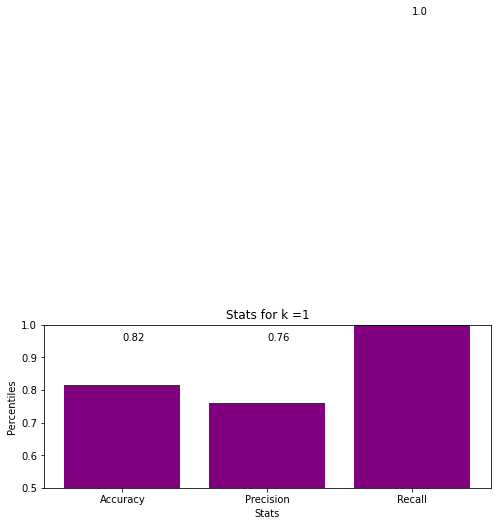

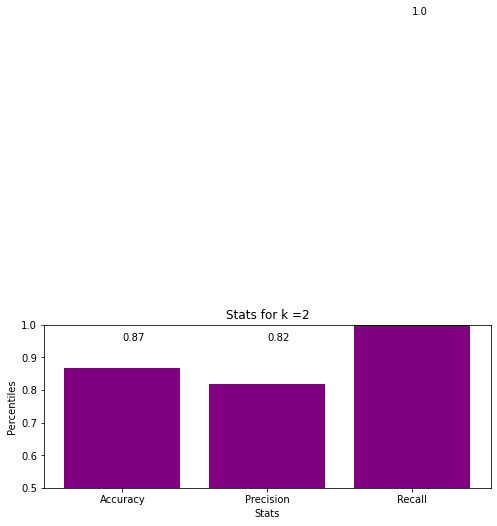

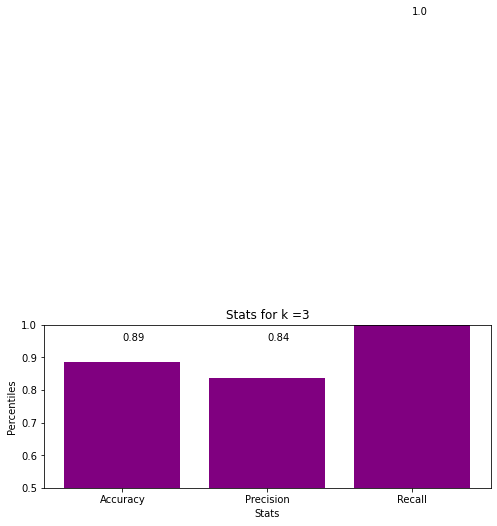

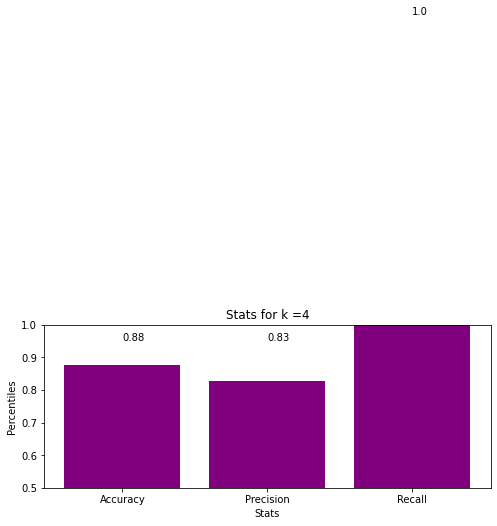

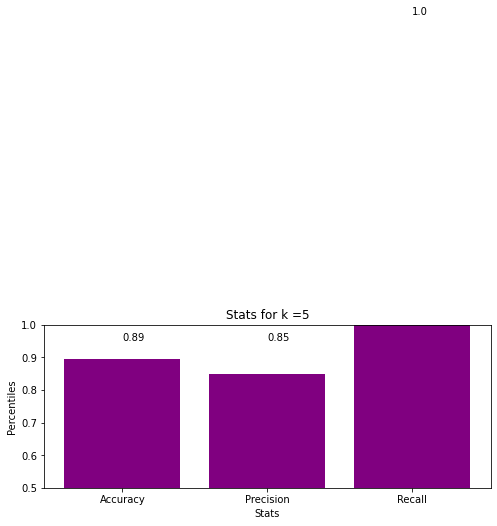

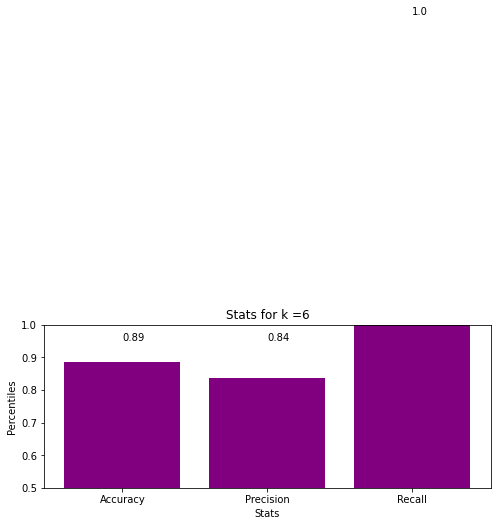

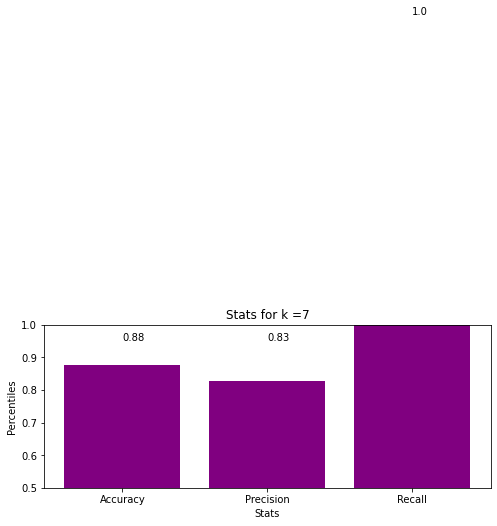

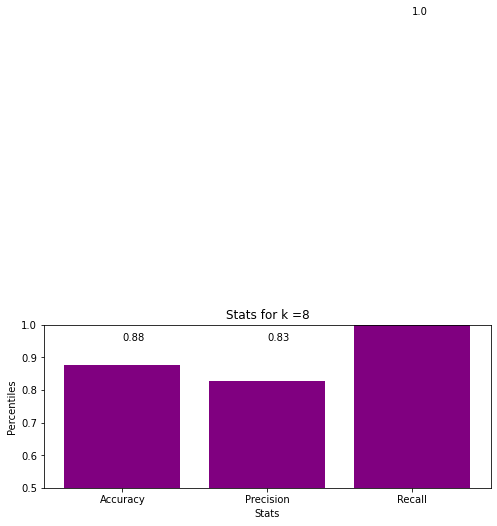

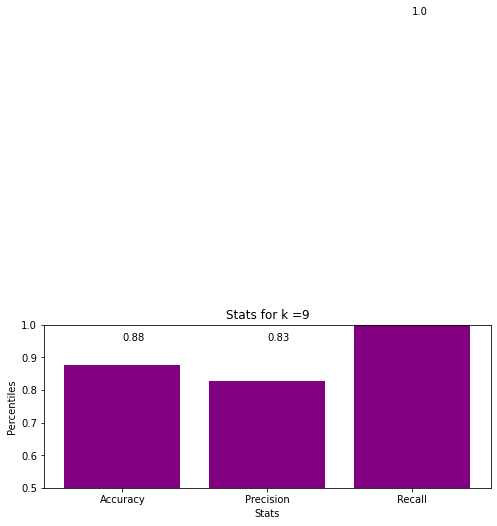

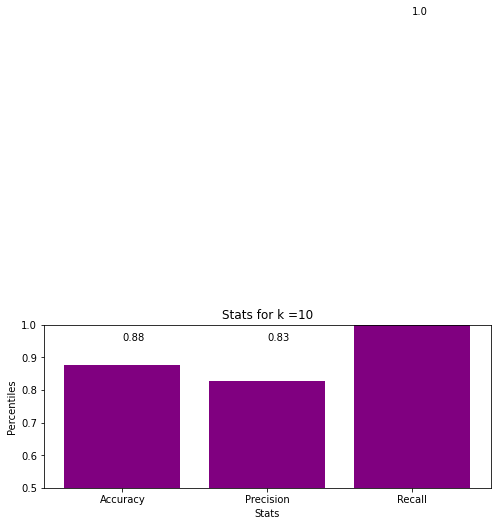

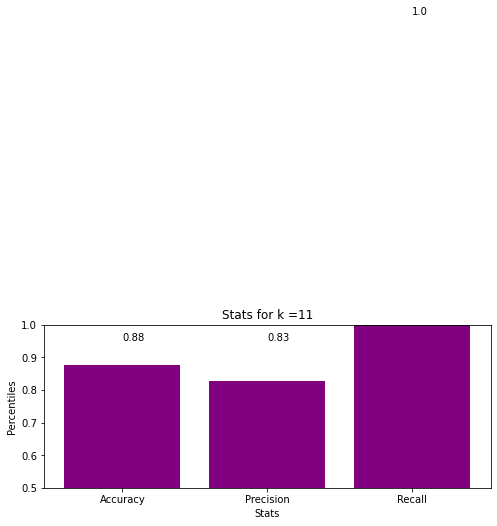

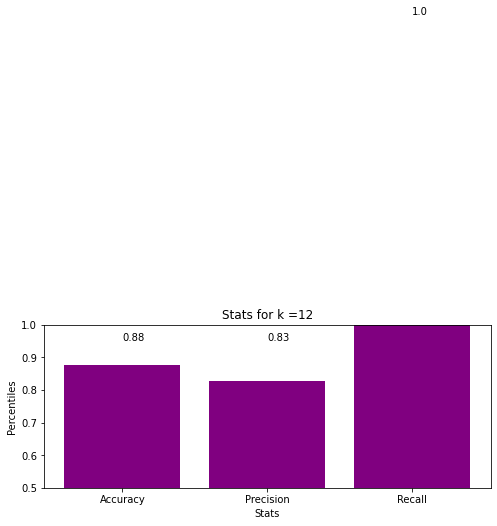

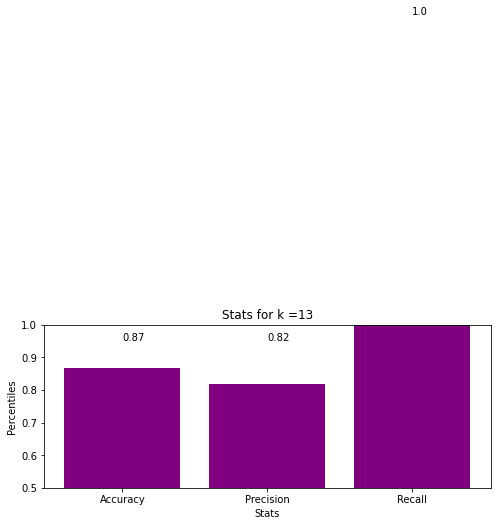

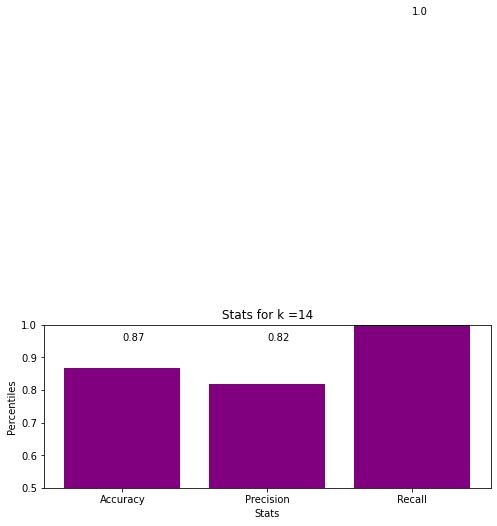

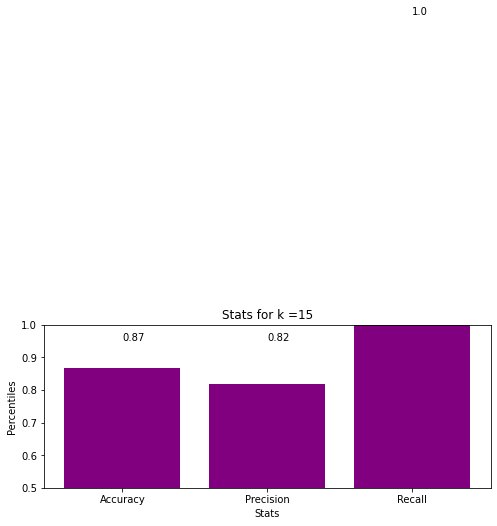

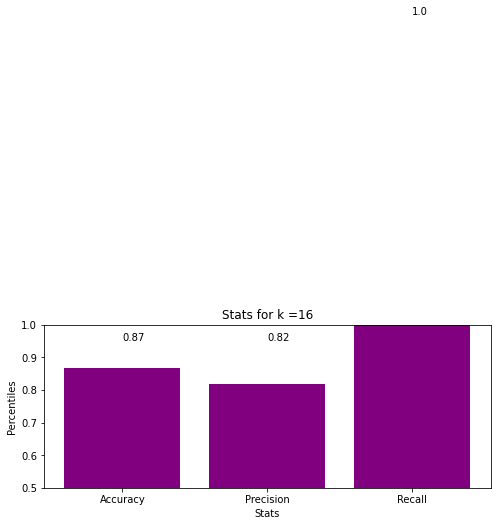

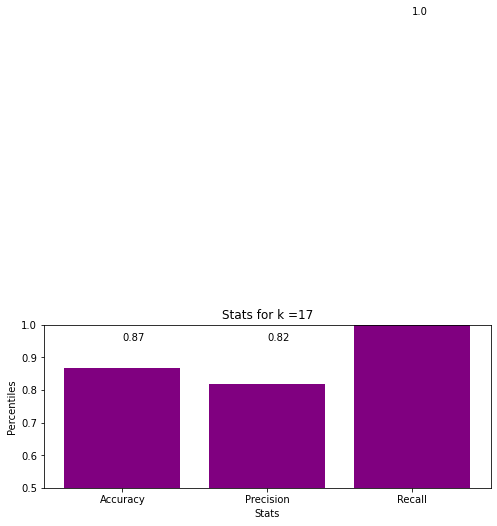

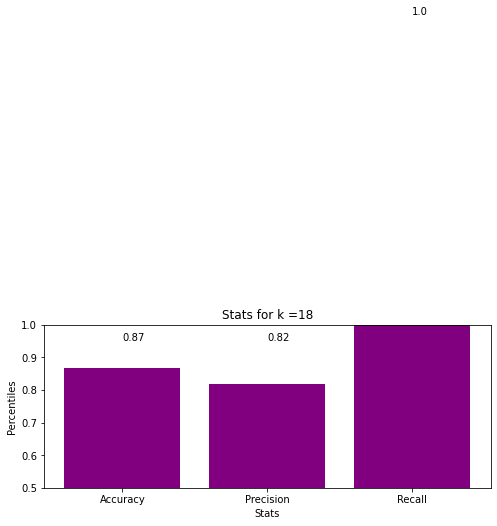

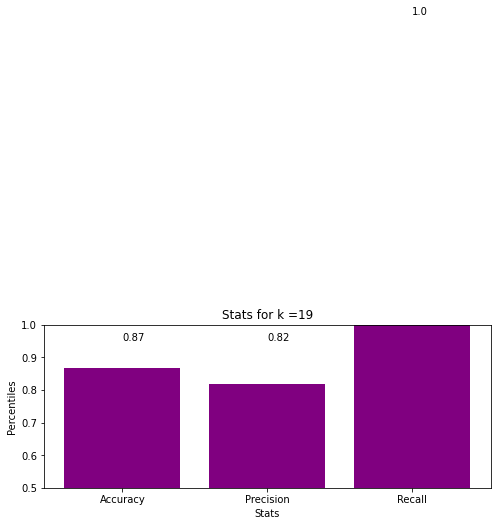

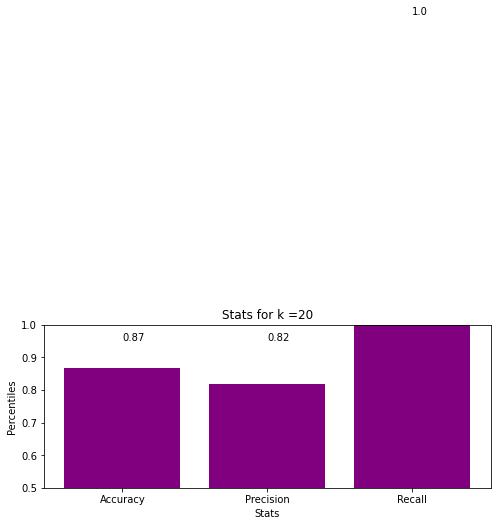

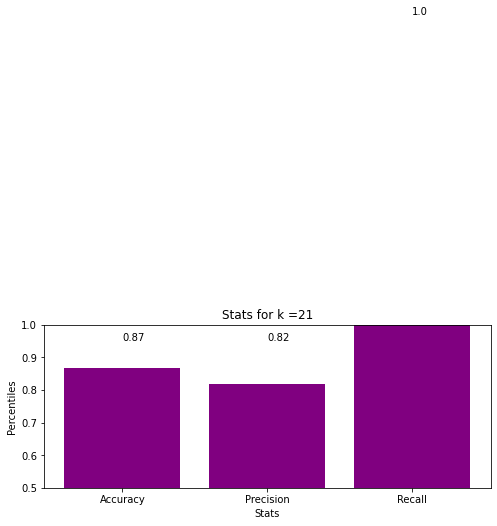

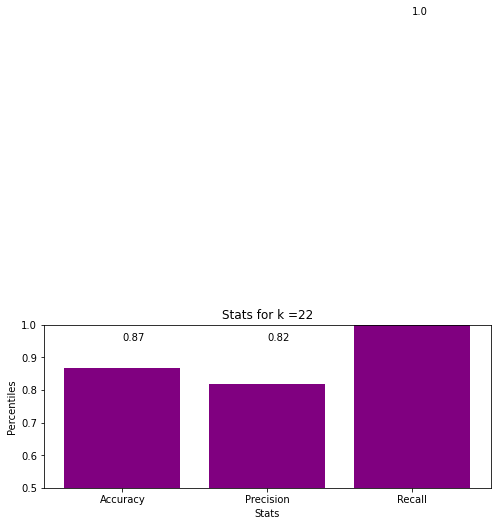

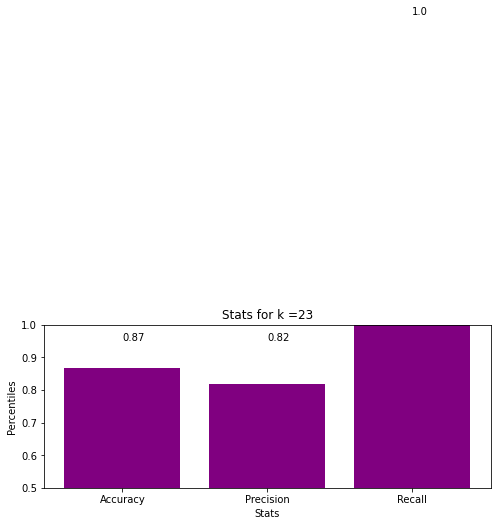

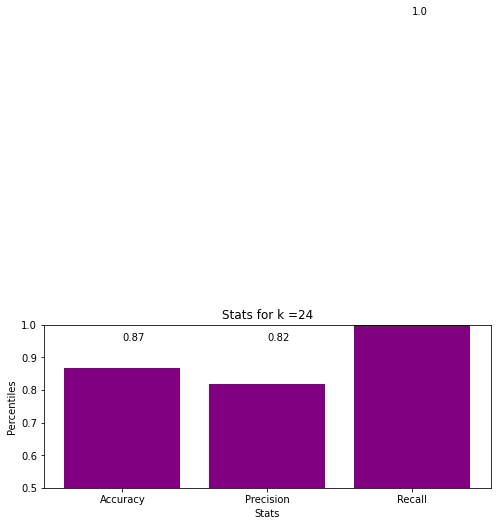

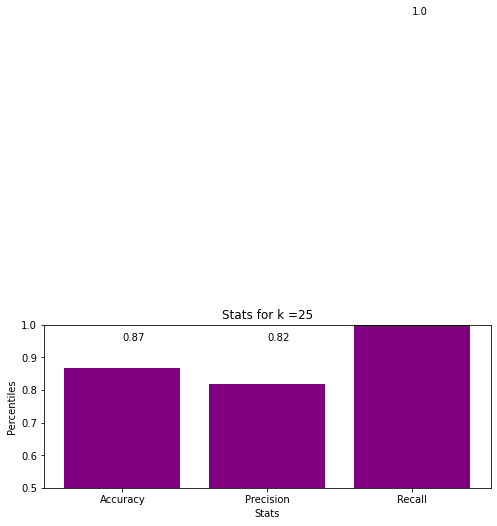

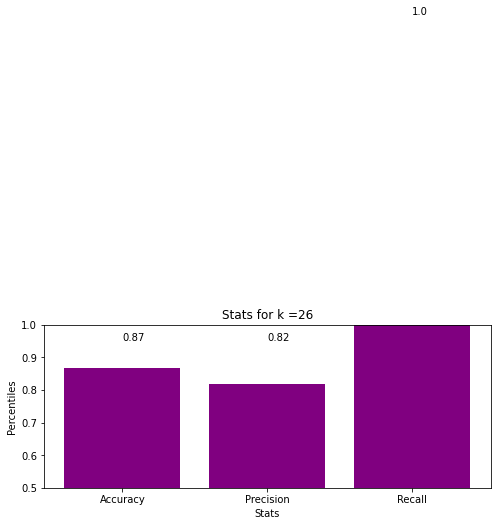

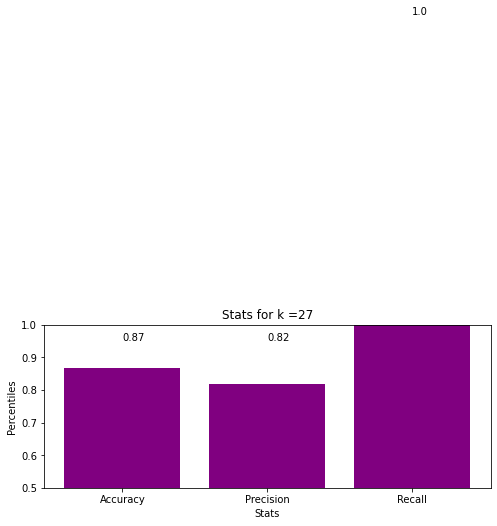

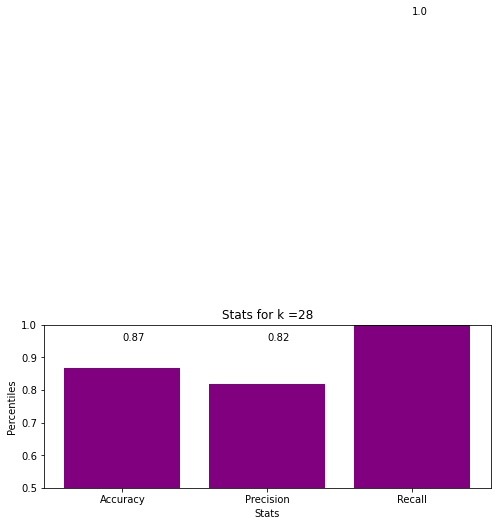

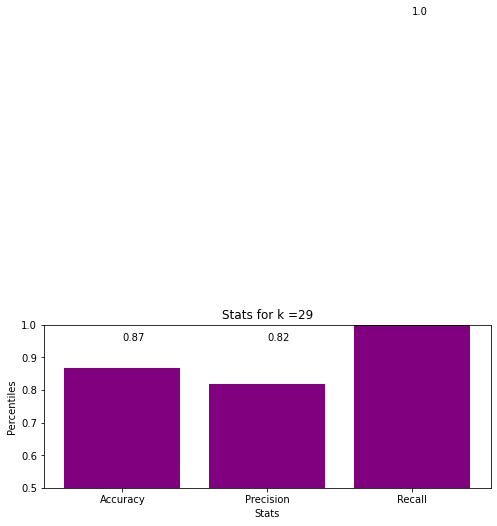

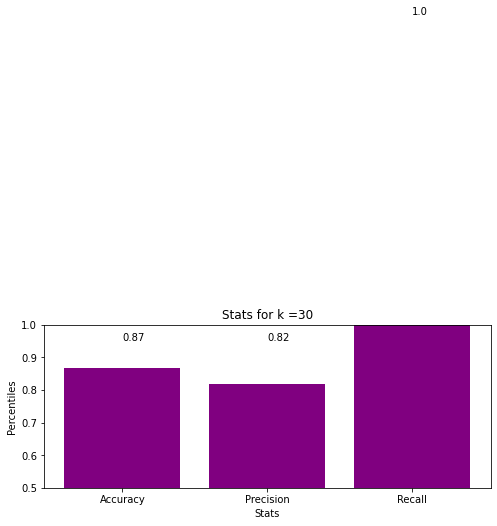

In [4]:
#Part 1 POLY (results are good but less than linear) 100% recall, k=4 is best unbalanced
model = SVC(kernel = 'poly',C=1)
for i in range(30):
    print(i+1)
    pca = PCA(n_components = (i+1))
    #pca = PCA(n_components = (15))
    xtrain_pca = pca.fit_transform(sxtrain)
    xtest_pca = pca.fit_transform(std.fit_transform(xtest))
    
    model.fit(xtrain_pca,ytrain)
    
    g = model.predict(xtest_pca)
    c = ytest
    
    print(classification_report(c,g))
    print(confusion_matrix(c,g))
    
    stats = {'Accuracy':accuracy_score(c,g),'Precision':precision_score(c,g),'Recall':recall_score(c,g)}
    names = list(stats.keys())
    values = list(stats.values())
    
    fig = plt.figure(figsize =(8,3))
    plt.ylim(.5,1)
    plt.bar(names,values,color = "purple")
    plt.xlabel("Stats")
    plt.ylabel("Percentiles")
    script = "Stats for k ="
    plt.title(script + str(i+1))
    
    for b in range(len(names)):
        plt.text(b,int(values[b])+.95,str(round(values[b],2)))

1
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        47
           1       0.76      1.00      0.86        67

    accuracy                           0.82       114
   macro avg       0.88      0.78      0.79       114
weighted avg       0.86      0.82      0.80       114

[[26 21]
 [ 0 67]]
2
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        47
           1       0.82      1.00      0.90        67

    accuracy                           0.87       114
   macro avg       0.91      0.84      0.85       114
weighted avg       0.89      0.87      0.86       114

[[32 15]
 [ 0 67]]
3
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        47
           1       0.84      1.00      0.91        67

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0

C:\Users\matth\AppData\Local\Temp\ipykernel_22568\3695218793.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize =(8,3))


[[32 15]
 [ 0 67]]
28
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        47
           1       0.82      1.00      0.90        67

    accuracy                           0.87       114
   macro avg       0.91      0.84      0.85       114
weighted avg       0.89      0.87      0.86       114

[[32 15]
 [ 0 67]]
29
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        47
           1       0.82      1.00      0.90        67

    accuracy                           0.87       114
   macro avg       0.91      0.84      0.85       114
weighted avg       0.89      0.87      0.86       114

[[32 15]
 [ 0 67]]
30
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        47
           1       0.82      1.00      0.90        67

    accuracy                           0.87       114
   macro avg       0.91      0.84      0.85       114
weighted

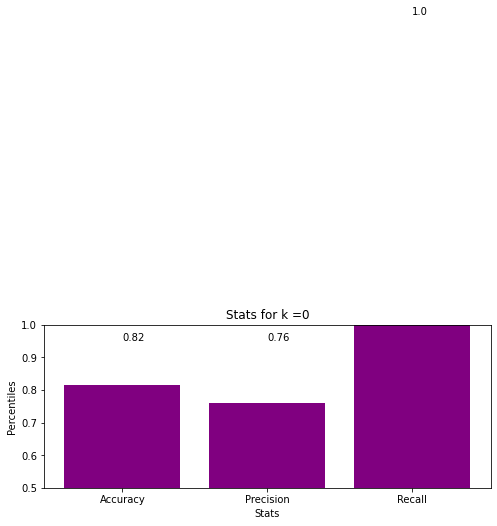

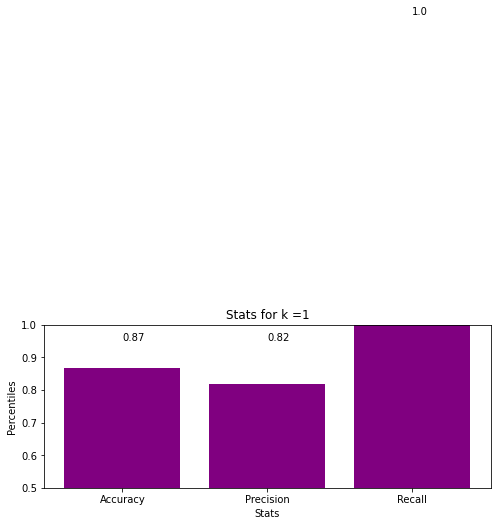

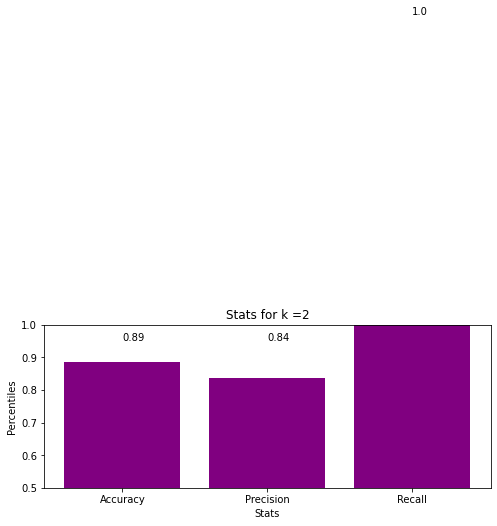

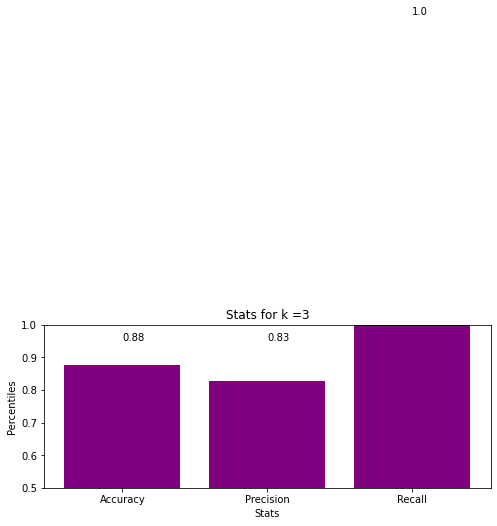

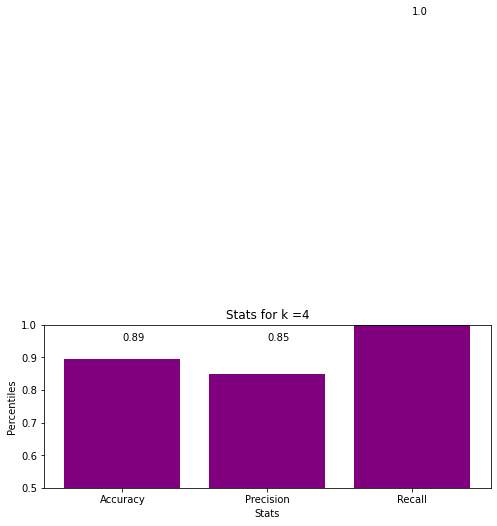

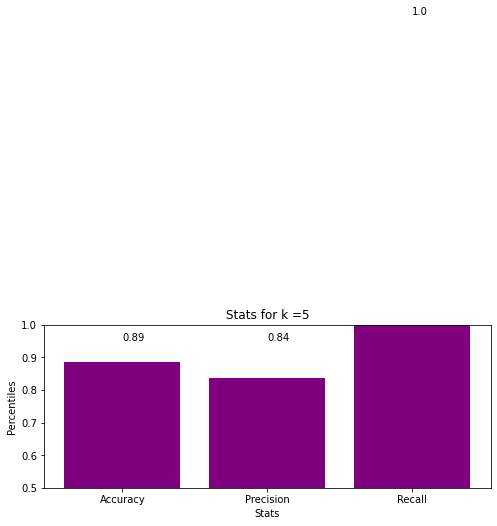

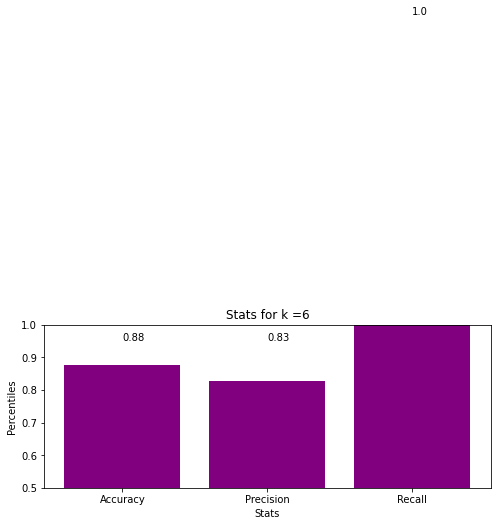

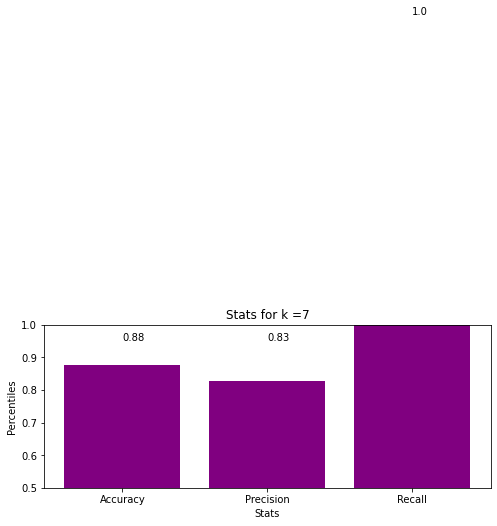

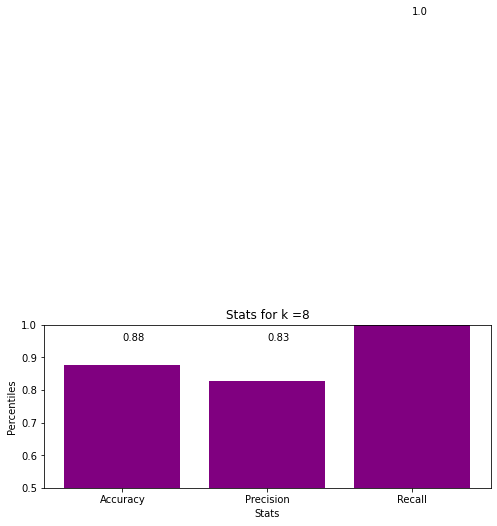

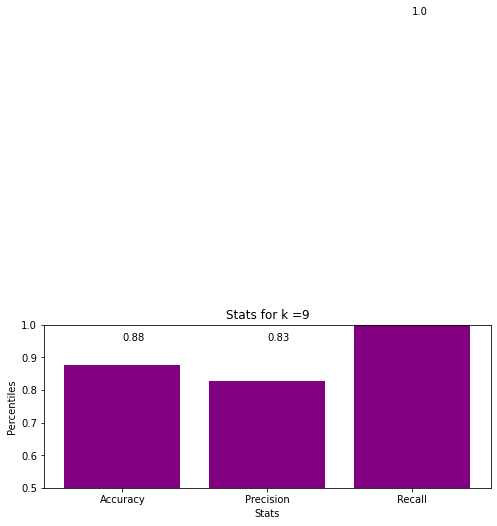

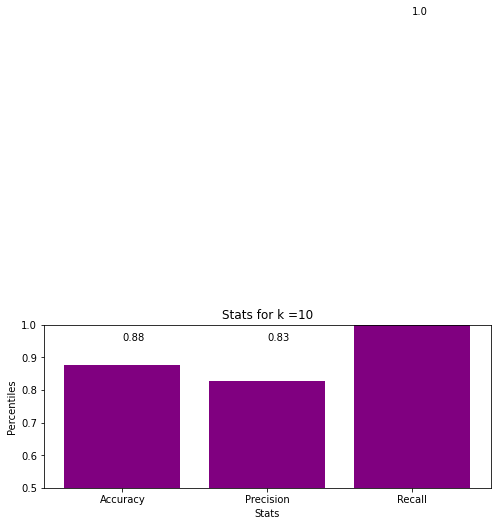

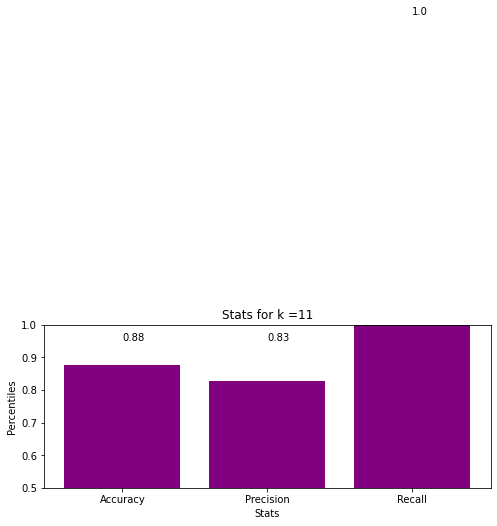

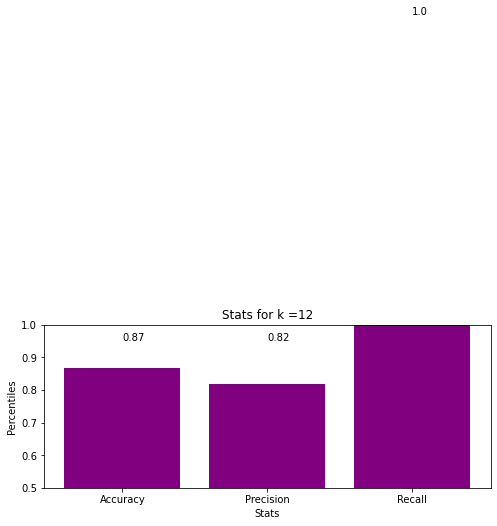

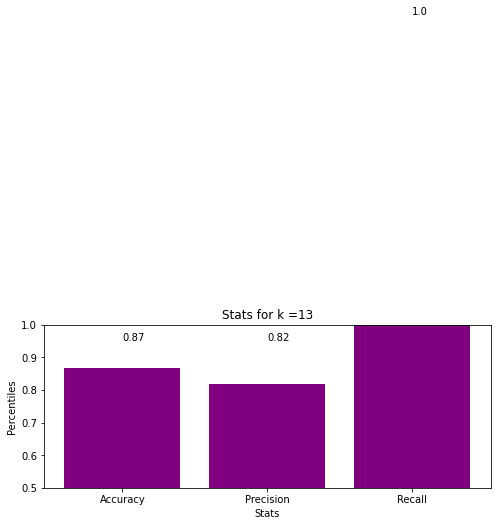

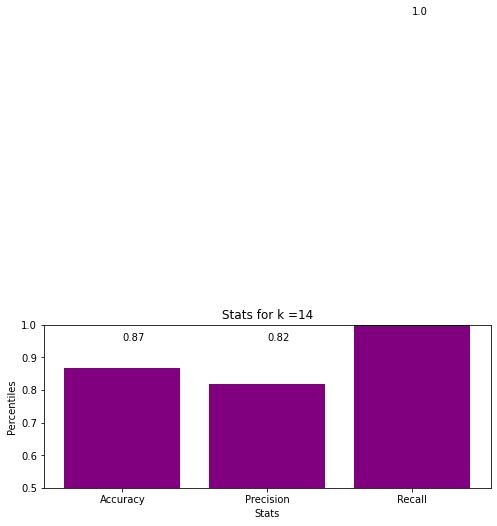

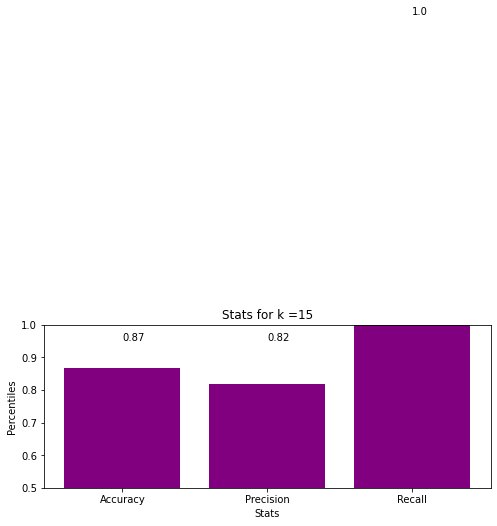

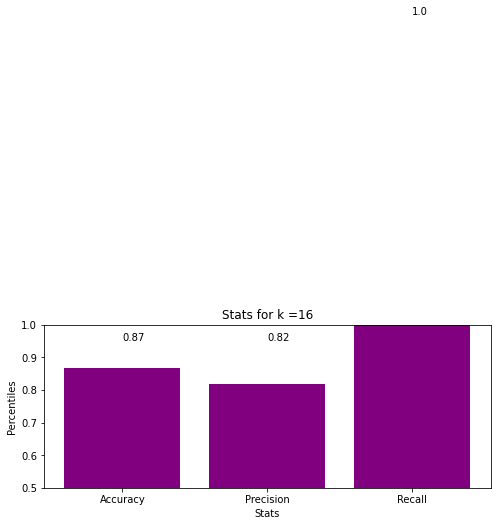

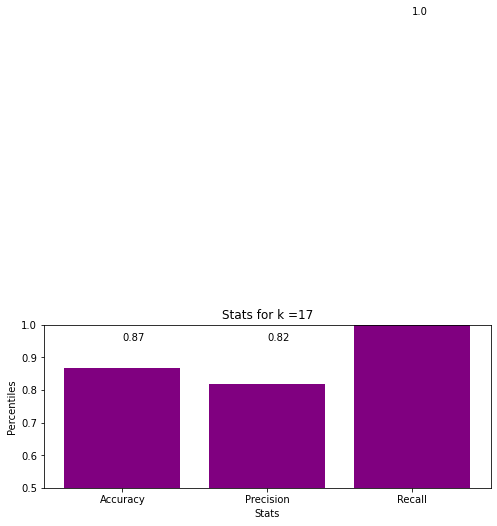

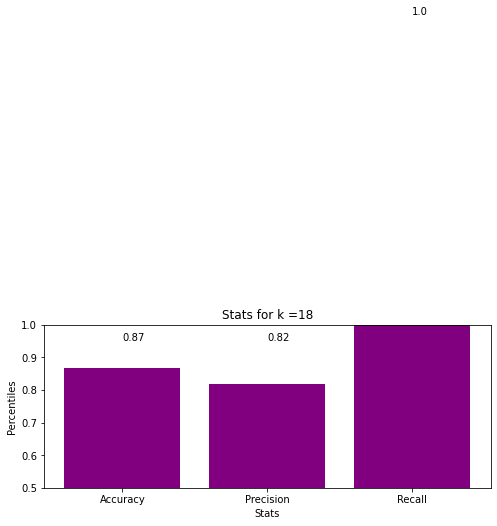

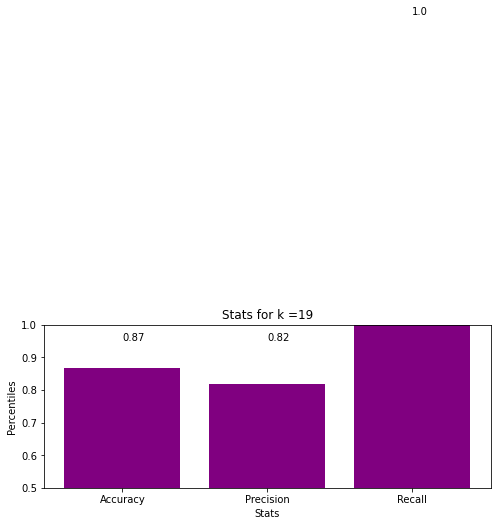

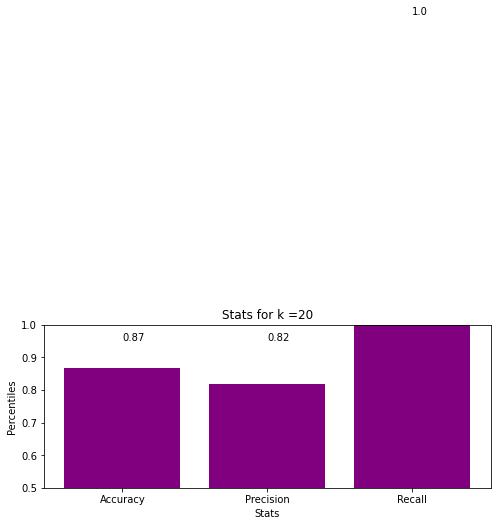

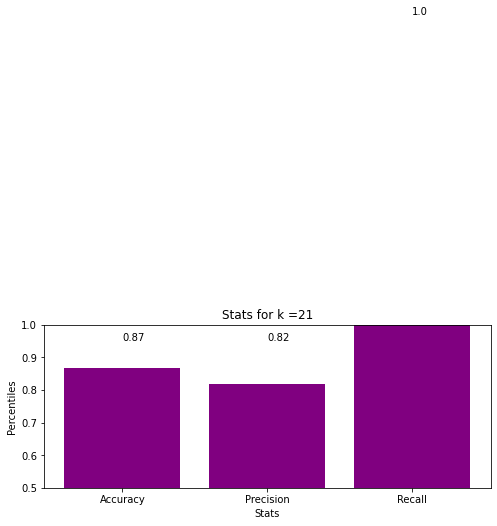

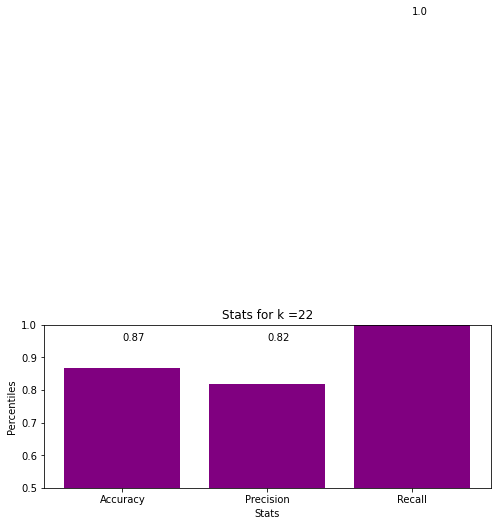

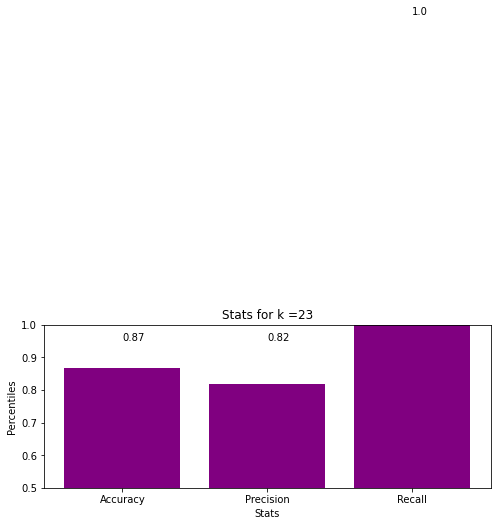

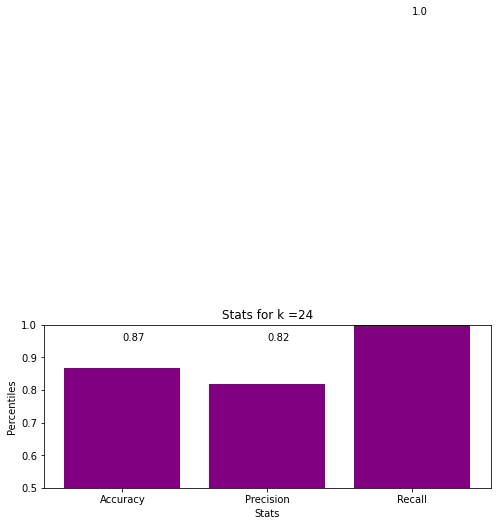

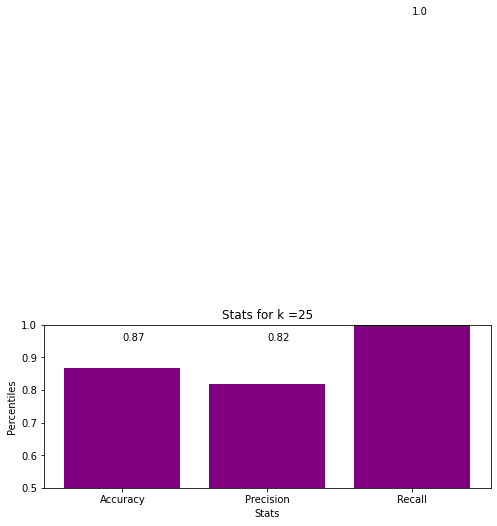

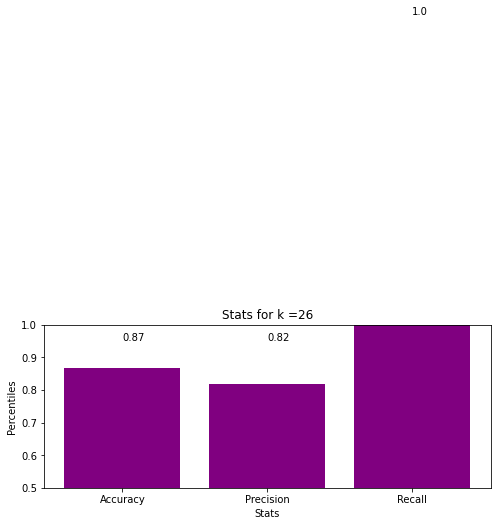

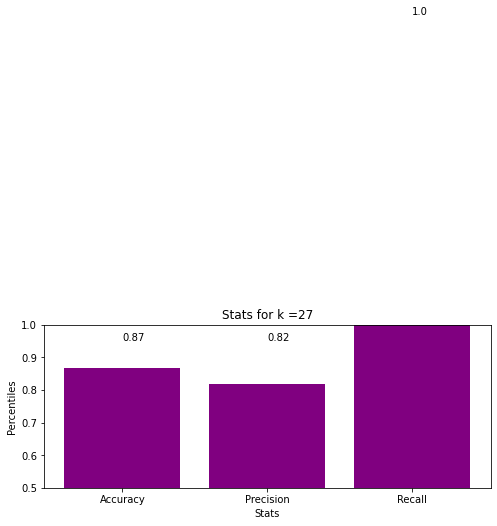

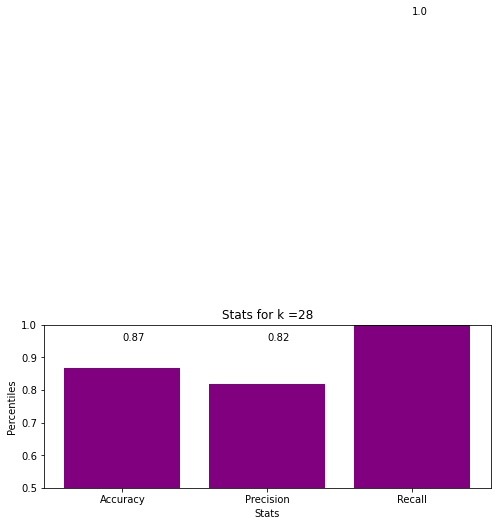

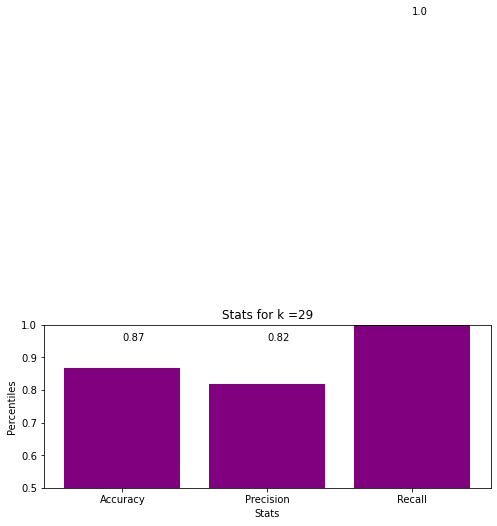

In [5]:
#Part 1 RBF (best k:5,acc:.96) probably best .96,.97,.96
model = SVC(kernel = 'poly',C=1)
for i in range(30):
    print(i+1)
    pca = PCA(n_components = (i+1))
    #pca = PCA(n_components = (15))
    xtrain_pca = pca.fit_transform(sxtrain)
    xtest_pca = pca.fit_transform(std.fit_transform(xtest))
    
    model.fit(xtrain_pca,ytrain)
    
    g = model.predict(xtest_pca)
    c = ytest
    
    print(classification_report(c,g))
    print(confusion_matrix(c,g))
    
    stats = {'Accuracy':accuracy_score(c,g),'Precision':precision_score(c,g),'Recall':recall_score(c,g)}
    names = list(stats.keys())
    values = list(stats.values())
    
    fig = plt.figure(figsize =(8,3))
    plt.ylim(.5,1)
    plt.bar(names,values,color = "purple")
    plt.xlabel("Stats")
    plt.ylabel("Percentiles")
    script = "Stats for k ="
    plt.title(script + str(i))
    
    for b in range(len(names)):
        plt.text(b,int(values[b])+.95,str(round(values[b],2)))

1
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        47
           1       0.88      0.87      0.87        67

    accuracy                           0.85       114
   macro avg       0.85      0.85      0.85       114
weighted avg       0.85      0.85      0.85       114

[[39  8]
 [ 9 58]]
2
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.90      0.91      0.90        67

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114

[[40  7]
 [ 6 61]]
3
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        47
           1       0.91      0.91      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        47
           1       0.95      0.91      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

[[44  3]
 [ 6 61]]


C:\Users\matth\AppData\Local\Temp\ipykernel_22568\874449564.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize =(8,3))


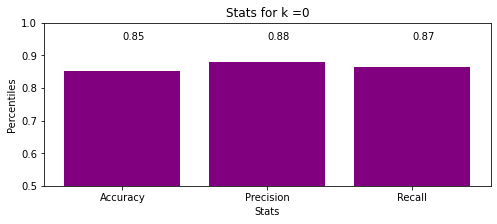

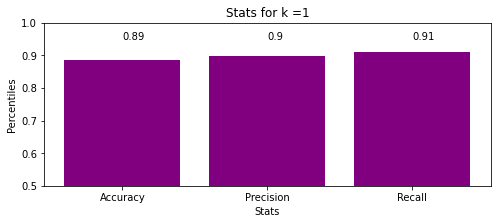

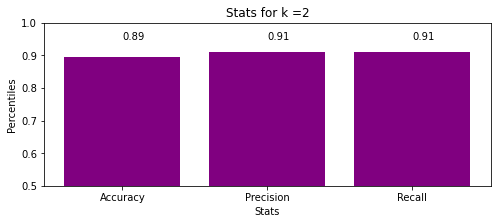

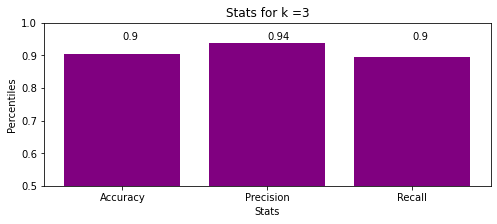

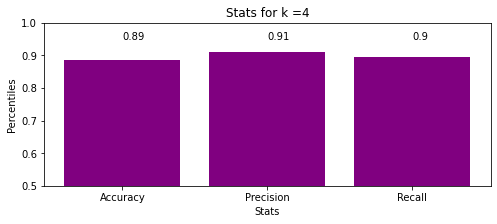

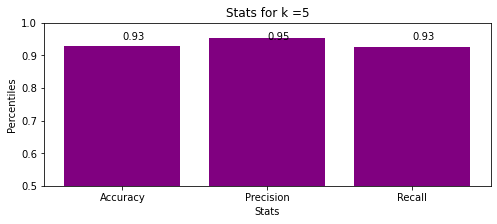

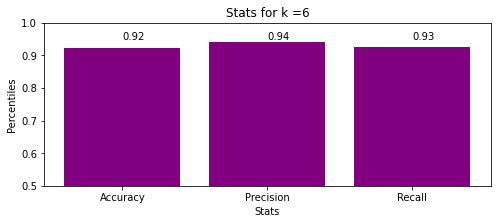

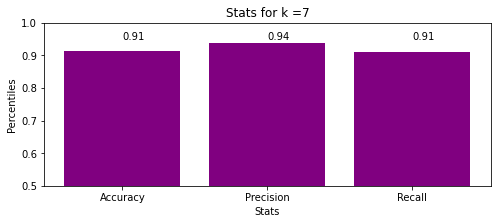

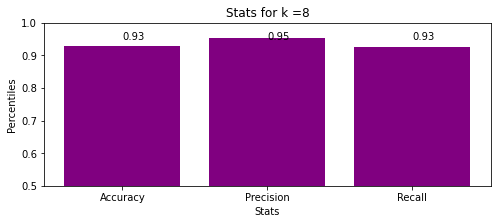

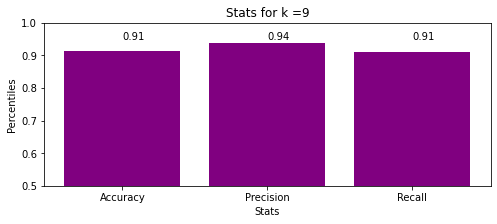

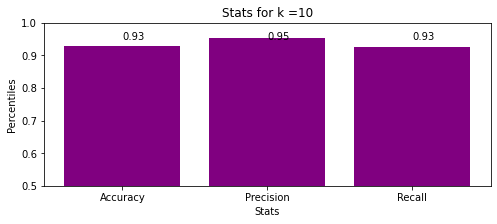

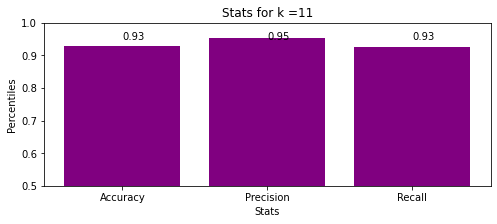

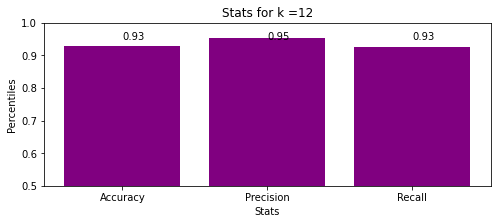

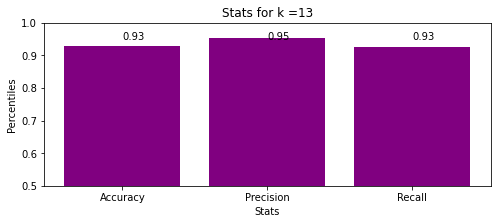

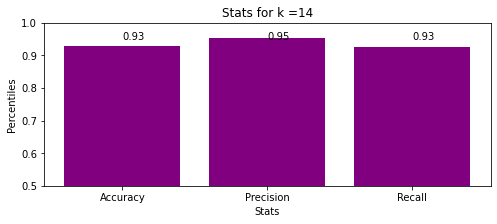

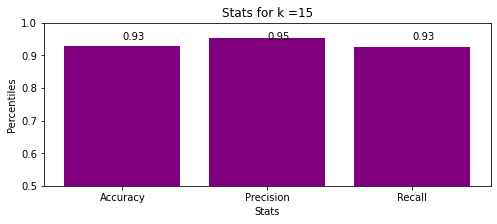

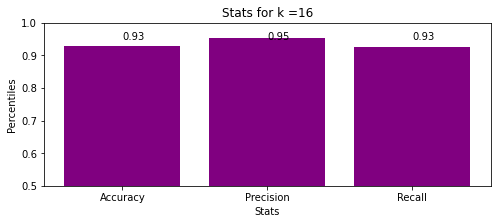

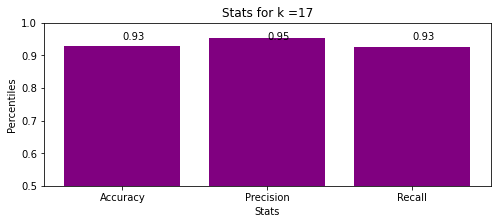

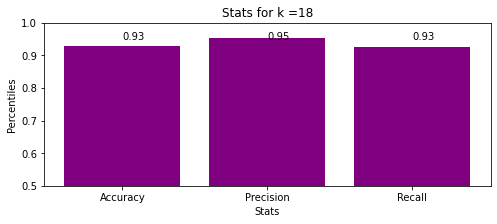

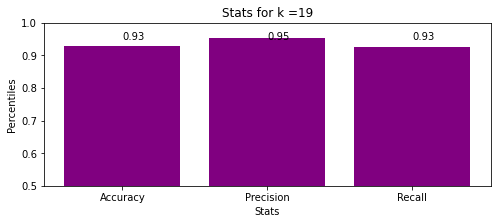

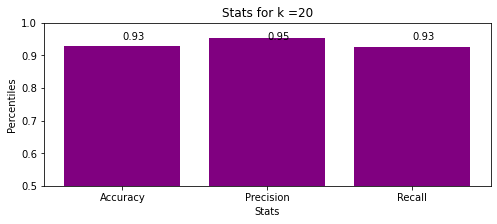

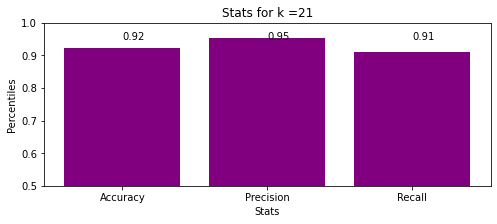

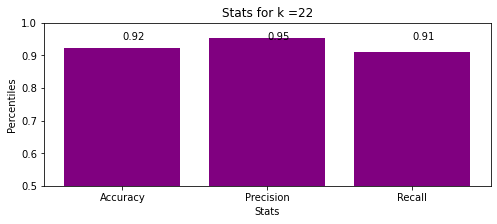

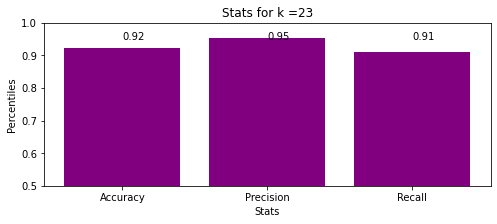

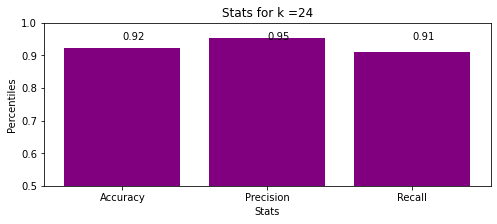

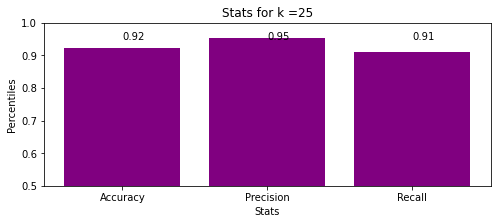

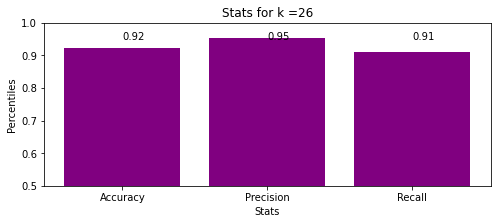

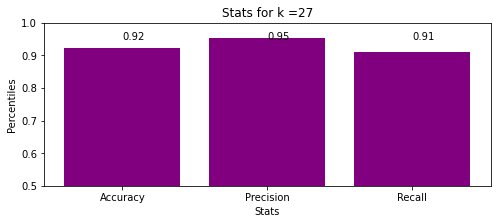

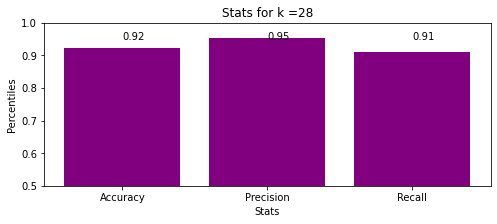

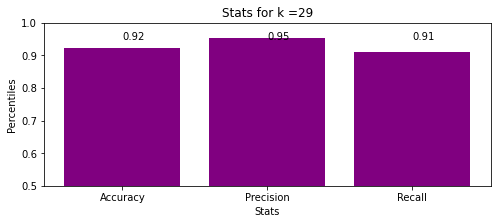

In [6]:
#part 1 SIGMOID (best: k=6 acc:.93)
model = SVC(kernel = 'sigmoid',C=1)
for i in range(30):
    print(i+1)
    pca = PCA(n_components = (i+1))
   
    xtrain_pca = pca.fit_transform(sxtrain)
    xtest_pca = pca.fit_transform(std.fit_transform(xtest))
    
    model.fit(xtrain_pca,ytrain)
    
    g = model.predict(xtest_pca)
    c = ytest
    
    print(classification_report(c,g))
    print(confusion_matrix(c,g))
    
    stats = {'Accuracy':accuracy_score(c,g),'Precision':precision_score(c,g),'Recall':recall_score(c,g)}
    names = list(stats.keys())
    values = list(stats.values())
    
    fig = plt.figure(figsize =(8,3))
    plt.ylim(.5,1)
    plt.bar(names,values,color = "purple")
    plt.xlabel("Stats")
    plt.ylabel("Percentiles")
    script = "Stats for k ="
    plt.title(script + str(i))
    
    for b in range(len(names)):
        plt.text(b,int(values[b])+.95,str(round(values[b],2)))

#part 1 (hw3 log reg vs. SVM)
#precision: when guess is positive, how many correct positive assumptions TP/(TP+FP)
#recall: when correct is positive, how many guesses were correct TP/(TP+FN)

#different kernel tricks: poly = highest recall, lowest precision; rbf = highest overall

 hw3 Log Reg vs. Hw 4 SVM (rbf)
 both have similar scorings, though logistic regression had slightly higher recall than rbf, however, rbf only needed k=4 while logistic regression needed k=15

In [7]:
#part 2 housing and SVR

df = pd.read_csv("Housing.csv")
#print(df)
xnum = ['area','bedrooms','bathrooms','stories','parking']
xbin = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
y = df['price'].values

In [8]:
#part 2 binary mapping
def map_bin(x):
    return x.map({'yes':1,'no':0})
xbin = df[xbin].apply(map_bin)

In [9]:
#part 2 put together
xtot=pd.concat((df[xnum],xbin),axis=1)


In [10]:
#part 2 train/test split
xtrain, xtest, ytrain, ytest = train_test_split(xtot,y,test_size = 0.2,random_state = 0,shuffle = True)

#Standardization
sxtrain = std.fit_transform(xtrain)
sxtest = std.transform(xtest)

[6.9532091e-310 6.9532091e-310 6.9532091e-310 6.9532091e-310
 6.9532091e-310 6.9532091e-310 6.9532091e-310 6.9532091e-310
 6.9532091e-310 6.9532091e-310 6.9532091e-310]
[6.9532091e-310 6.9532091e-310 6.9532091e-310 6.9532091e-310
 6.9532091e-310 6.9532091e-310 6.9532091e-310 6.9532091e-310
 6.9532091e-310 6.9532091e-310 6.9532091e-310]
[6.95320528e-310 6.95320528e-310 6.95320528e-310 6.95320528e-310
 6.95320528e-310 6.95320528e-310 6.95320528e-310 6.95320528e-310
 6.95320528e-310 6.95320528e-310 6.95320528e-310]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


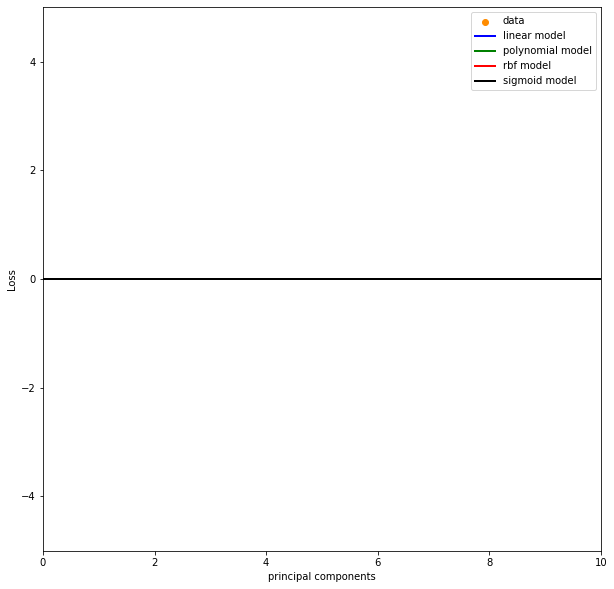

In [11]:
#part 2 SVR + PCA
model_lin = SVR(kernel='linear',C=1)
model_pol = SVR(kernel ='poly',C=1)
model_rbf = SVR(kernel = 'rbf',C=1)
model_sig = SVR(kernel = 'sigmoid',C=1)

lin_arr=np.empty(shape=11)
pol_arr=np.empty(shape=11)
rbf_arr=np.empty(shape=11)
sig_arr=np.empty(shape=11)

for i in range(11):
    pca = PCA(n_components=(i+1))
    

    xtrain_pca = pca.fit_transform(sxtrain)
    xtest_pca = pca.transform(std.transform(xtest))

    y_lin = model_lin.fit(xtrain_pca,ytrain).predict(xtest_pca)
    y_pol = model_pol.fit(xtrain_pca,ytrain).predict(xtest_pca)
    y_rbf = model_rbf.fit(xtrain_pca,ytrain).predict(xtest_pca)
    y_sig = model_sig.fit(xtrain_pca,ytrain).predict(xtest_pca)

    lin_loss = model_lin.score(xtest_pca,ytest)
    pol_loss = model_pol.score(xtest_pca,ytest)
    rbf_loss = model_rbf.score(xtest_pca,ytest)
    sig_loss = model_sig.score(xtest_pca,ytest)

    np.append(lin_arr,lin_loss)
    np.append(pol_arr,pol_loss)
    np.append(rbf_arr,rbf_loss)
    np.append(sig_arr,sig_loss)


print(lin_arr)
print(pol_arr)
print(rbf_arr)
print(sig_arr)
lw=2   
fig = [plt.figure(figsize=(10,10))]
plt.ylim(-5,5)
plt.xlim(0,10)
plt.scatter(len(df['price'].values),100,color = 'darkorange', label ='data')
            
plt.plot(lin_arr,color = 'blue',lw = lw, label ='linear model')
plt.plot(pol_arr,color = 'green',lw = lw, label ='polynomial model')
plt.plot(rbf_arr,color = 'red',lw = lw, label ='rbf model')
plt.plot(sig_arr,color = 'black',lw = lw, label ='sigmoid model')
plt.xlabel("principal components")
plt.ylabel("Loss")
plt.legend()
